In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Loading Data (Source: JHU)

In [2]:
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [4]:
cols = confirmed_df.keys()

confirmed  = confirmed_df.loc[:, cols[4]:]
deaths     = deaths_df.loc[:, cols[4]:]
recoveries = recoveries_df.loc[:, cols[4]:]

confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,0,0,0,0,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,0,0,0,0,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,0,0,0,0,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,0,0,0,0,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [5]:
def get_data(country):
    cases = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
    daily_increase = pd.Series(cases).diff().tolist()
    deaths = [deaths_df[deaths_df['Country/Region']==country][i].sum() for i in dates]
    daily_death = pd.Series(deaths).diff().tolist()
    recoveries  = [recoveries_df[recoveries_df['Country/Region']==country][i].sum() for i in dates]
    daily_recovery = pd.Series(recoveries).diff().tolist()
    return (cases, deaths, recoveries, daily_increase, daily_death, daily_recovery)

def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1, linewidth=4)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3, color='darkgoldenrod')
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4, color='green')
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

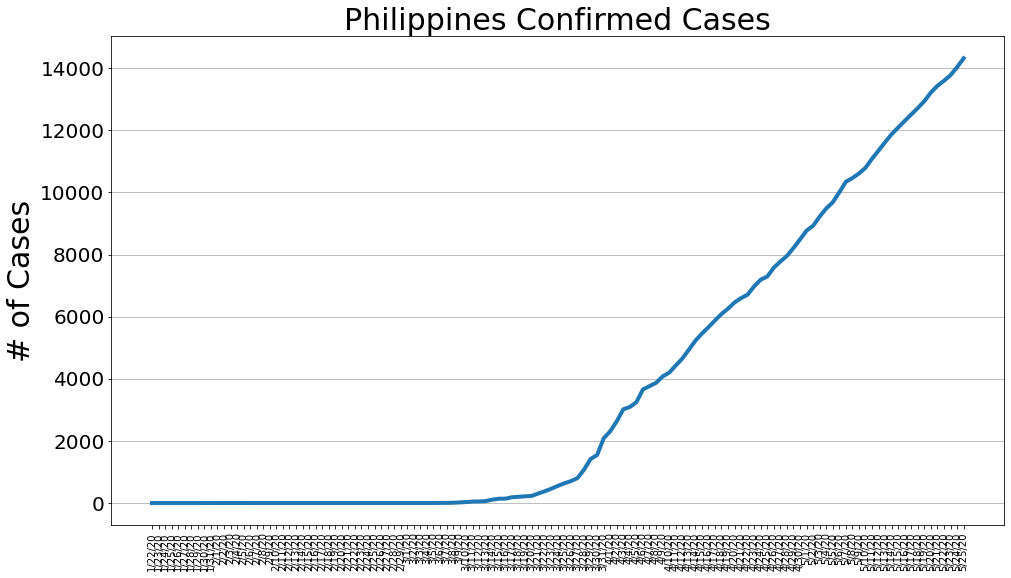

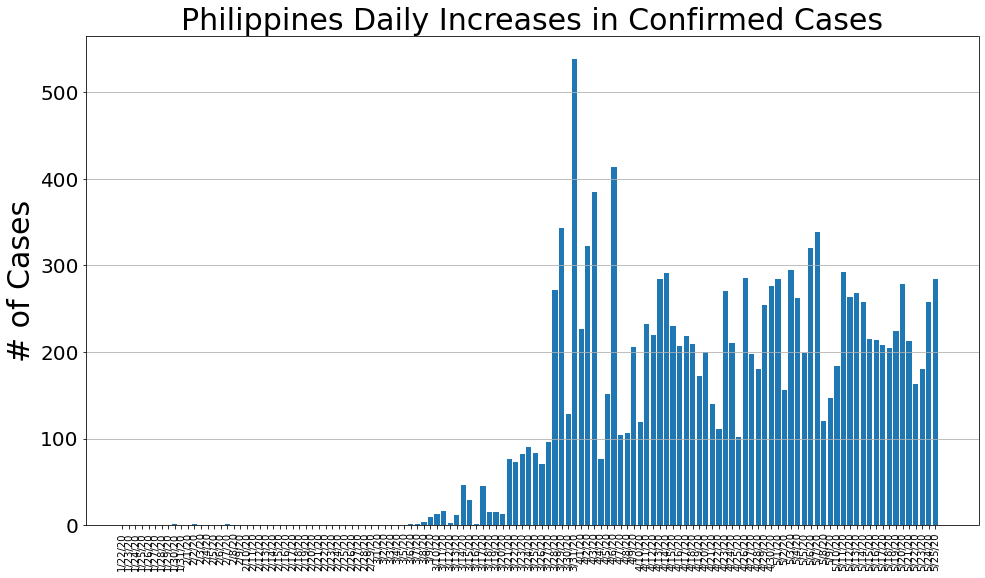

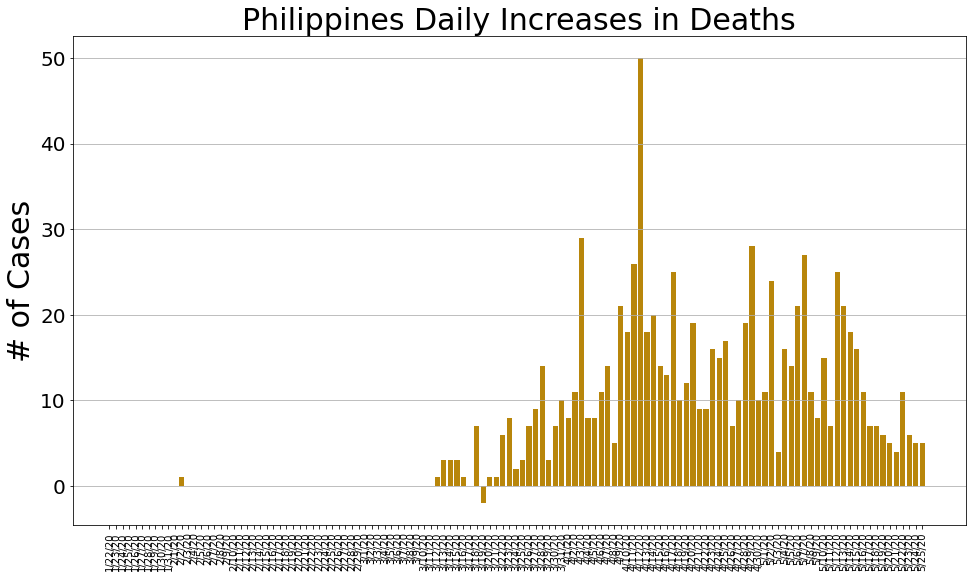

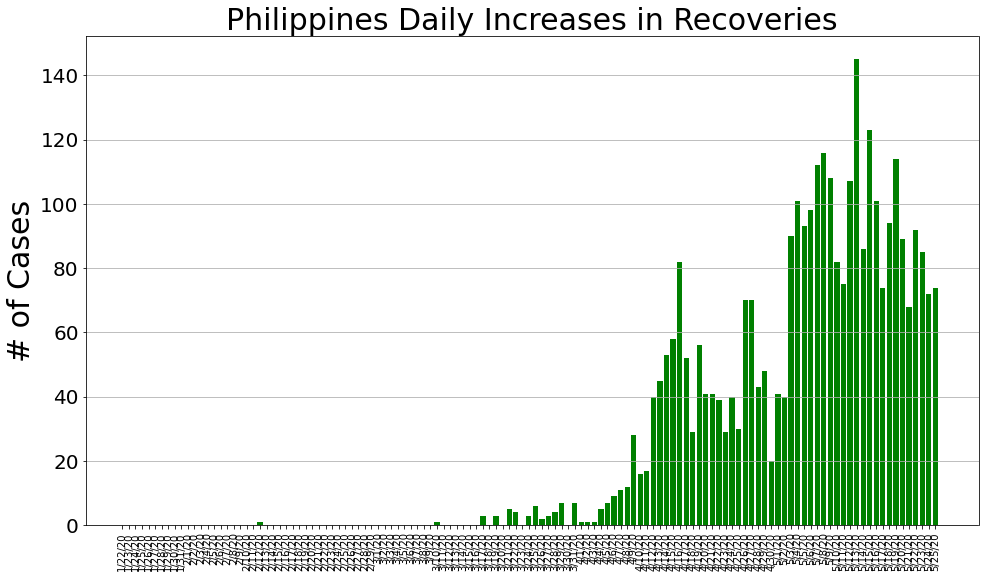

In [6]:
dates = confirmed.keys()
country = 'Philippines'
philippine_cases, philippine_deaths, philippine_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, philippine_cases, daily_increase, daily_death, daily_recovery, country)

In [7]:
np.c_[np.array(range(1,len(dates)+1)), dates, philippine_cases]

array([[1, '1/22/20', 0],
       [2, '1/23/20', 0],
       [3, '1/24/20', 0],
       [4, '1/25/20', 0],
       [5, '1/26/20', 0],
       [6, '1/27/20', 0],
       [7, '1/28/20', 0],
       [8, '1/29/20', 0],
       [9, '1/30/20', 1],
       [10, '1/31/20', 1],
       [11, '2/1/20', 1],
       [12, '2/2/20', 2],
       [13, '2/3/20', 2],
       [14, '2/4/20', 2],
       [15, '2/5/20', 2],
       [16, '2/6/20', 2],
       [17, '2/7/20', 3],
       [18, '2/8/20', 3],
       [19, '2/9/20', 3],
       [20, '2/10/20', 3],
       [21, '2/11/20', 3],
       [22, '2/12/20', 3],
       [23, '2/13/20', 3],
       [24, '2/14/20', 3],
       [25, '2/15/20', 3],
       [26, '2/16/20', 3],
       [27, '2/17/20', 3],
       [28, '2/18/20', 3],
       [29, '2/19/20', 3],
       [30, '2/20/20', 3],
       [31, '2/21/20', 3],
       [32, '2/22/20', 3],
       [33, '2/23/20', 3],
       [34, '2/24/20', 3],
       [35, '2/25/20', 3],
       [36, '2/26/20', 3],
       [37, '2/27/20', 3],
       [38, '2/28/2

## 1. LINEAR REGRESSION: Training on the Whole Data until May 11, 2020

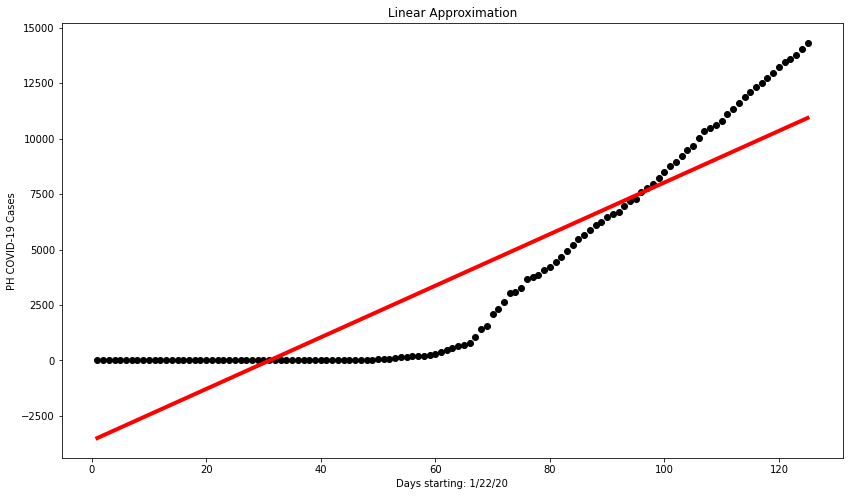

In [8]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
X = np.linspace(1, len(dates), len(dates)).reshape(-1, 1)
y = np.array(philippine_cases)

lin_model.fit(X, y)

def plot_linear():
    plt.figure(figsize=(14,8))
    plt.scatter(X, y, color='black')
    plt.plot(X, lin_model.predict(X), color='red', linewidth=4)
    plt.title( 'Linear Approximation' )
    plt.xlabel('Days starting: 1/22/20')
    plt.ylabel('PH COVID-19 Cases')
    plt.show()
    return

plot_linear()

## 2. Polynomial: Training on the Whole Data until May 11, 2020

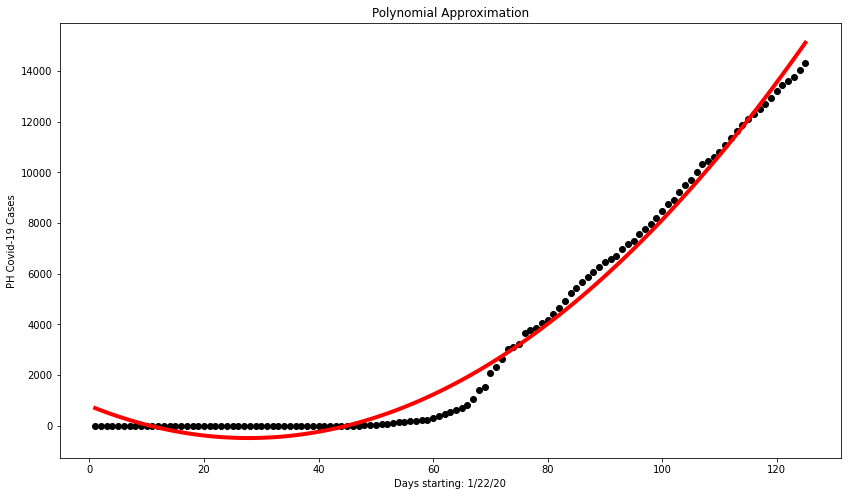

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg  = PolynomialFeatures(degree=2)
X_poly    = poly_reg.fit_transform(X)
pol_model = LinearRegression()

pol_model.fit(X_poly, y)

pol_predictions = pol_model.predict(poly_reg.fit_transform(X))
 
def plot_polymonial(predictions):
    plt.figure(figsize=(14,8))
    plt.scatter(X, y, color='black')
    plt.plot(X, predictions, color='red', linewidth=4)
    plt.title('Polynomial Approximation')
    plt.xlabel('Days starting: 1/22/20')
    plt.ylabel('PH Covid-19 Cases')
    plt.show()
    return


plot_polymonial(pol_predictions)

## 3. Training on Partial Data until April 30, 2020

In [10]:
np.c_[dates[:100], philippine_cases[:100]]

array([['1/22/20', 0],
       ['1/23/20', 0],
       ['1/24/20', 0],
       ['1/25/20', 0],
       ['1/26/20', 0],
       ['1/27/20', 0],
       ['1/28/20', 0],
       ['1/29/20', 0],
       ['1/30/20', 1],
       ['1/31/20', 1],
       ['2/1/20', 1],
       ['2/2/20', 2],
       ['2/3/20', 2],
       ['2/4/20', 2],
       ['2/5/20', 2],
       ['2/6/20', 2],
       ['2/7/20', 3],
       ['2/8/20', 3],
       ['2/9/20', 3],
       ['2/10/20', 3],
       ['2/11/20', 3],
       ['2/12/20', 3],
       ['2/13/20', 3],
       ['2/14/20', 3],
       ['2/15/20', 3],
       ['2/16/20', 3],
       ['2/17/20', 3],
       ['2/18/20', 3],
       ['2/19/20', 3],
       ['2/20/20', 3],
       ['2/21/20', 3],
       ['2/22/20', 3],
       ['2/23/20', 3],
       ['2/24/20', 3],
       ['2/25/20', 3],
       ['2/26/20', 3],
       ['2/27/20', 3],
       ['2/28/20', 3],
       ['2/29/20', 3],
       ['3/1/20', 3],
       ['3/2/20', 3],
       ['3/3/20', 3],
       ['3/4/20', 3],
       ['3/5/20', 3],
  

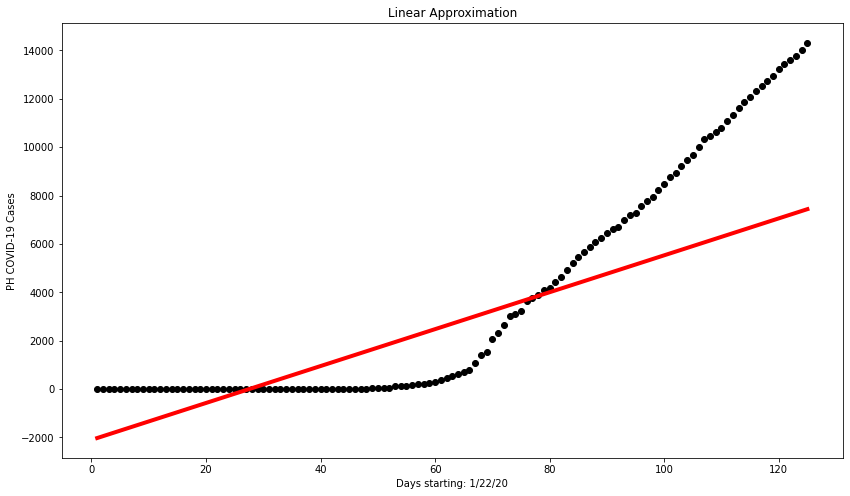

In [11]:
lin_partial = LinearRegression()
lin_partial.fit(X[:100], y[:100])
lin_predictions = lin_partial.predict(X)

def plot_linear(predictions):
    plt.figure(figsize=(14,8))
    plt.scatter(X, y, color='black')
    plt.plot(X, predictions, color='red', linewidth=4)
    plt.title( 'Linear Approximation' )
    plt.xlabel('Days starting: 1/22/20')
    plt.ylabel('PH COVID-19 Cases')
    plt.show()
    return

plot_linear(lin_predictions)

## 4. Linear Predictions (Cases Forecast)

In [12]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[100:], philippine_cases[100:], np.ceil(lin_predictions[100:])]

       Date  Actual_Cases Predictions


array([['5/1/20', 8772, 5606.0],
       ['5/2/20', 8928, 5682.0],
       ['5/3/20', 9223, 5759.0],
       ['5/4/20', 9485, 5835.0],
       ['5/5/20', 9684, 5911.0],
       ['5/6/20', 10004, 5988.0],
       ['5/7/20', 10343, 6064.0],
       ['5/8/20', 10463, 6140.0],
       ['5/9/20', 10610, 6217.0],
       ['5/10/20', 10794, 6293.0],
       ['5/11/20', 11086, 6369.0],
       ['5/12/20', 11350, 6446.0],
       ['5/13/20', 11618, 6522.0],
       ['5/14/20', 11876, 6598.0],
       ['5/15/20', 12091, 6674.0],
       ['5/16/20', 12305, 6751.0],
       ['5/17/20', 12513, 6827.0],
       ['5/18/20', 12718, 6903.0],
       ['5/19/20', 12942, 6980.0],
       ['5/20/20', 13221, 7056.0],
       ['5/21/20', 13434, 7132.0],
       ['5/22/20', 13597, 7209.0],
       ['5/23/20', 13777, 7285.0],
       ['5/24/20', 14035, 7361.0],
       ['5/25/20', 14319, 7438.0]], dtype=object)

### DATE: '5/9/20', ACTUAL: 10610, LINEAR PREDICTION: 6217

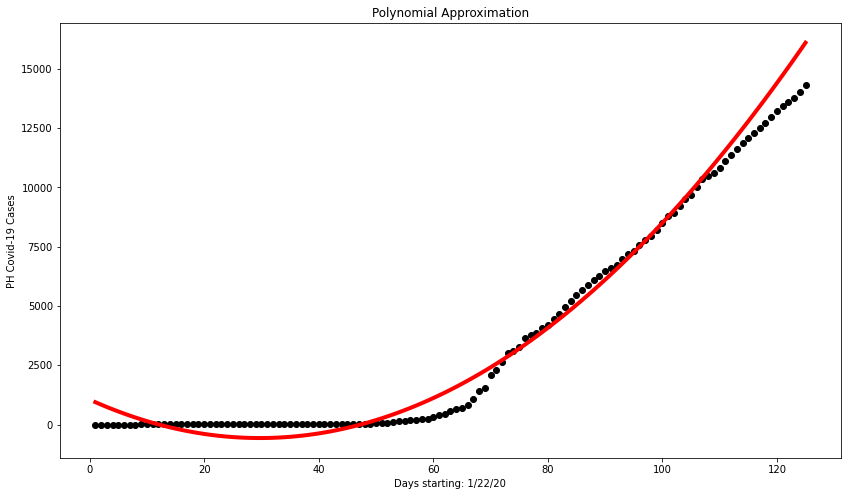

In [13]:
poly_reg    = PolynomialFeatures(degree=2)
X_poly      = poly_reg.fit_transform(X[:100])
pol_partial = LinearRegression()

pol_partial.fit(X_poly, y[:100])

pol_predictions = pol_partial.predict(poly_reg.fit_transform(X))
 
plot_polymonial(pol_predictions)

In [14]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[100:], philippine_cases[100:], np.ceil(pol_predictions[100:])]

       Date  Actual_Cases Predictions


array([['5/1/20', 8772, 8757.0],
       ['5/2/20', 8928, 9021.0],
       ['5/3/20', 9223, 9288.0],
       ['5/4/20', 9485, 9559.0],
       ['5/5/20', 9684, 9833.0],
       ['5/6/20', 10004, 10111.0],
       ['5/7/20', 10343, 10393.0],
       ['5/8/20', 10463, 10679.0],
       ['5/9/20', 10610, 10968.0],
       ['5/10/20', 10794, 11261.0],
       ['5/11/20', 11086, 11557.0],
       ['5/12/20', 11350, 11857.0],
       ['5/13/20', 11618, 12161.0],
       ['5/14/20', 11876, 12469.0],
       ['5/15/20', 12091, 12780.0],
       ['5/16/20', 12305, 13095.0],
       ['5/17/20', 12513, 13414.0],
       ['5/18/20', 12718, 13736.0],
       ['5/19/20', 12942, 14062.0],
       ['5/20/20', 13221, 14391.0],
       ['5/21/20', 13434, 14724.0],
       ['5/22/20', 13597, 15061.0],
       ['5/23/20', 13777, 15402.0],
       ['5/24/20', 14035, 15746.0],
       ['5/25/20', 14319, 16094.0]], dtype=object)

### DATE: '5/9/20', ACTUAL: 10610, PREDICTION: 10968  (NOT BAD FOR 2nd DEGREE POLYNOMIAL)

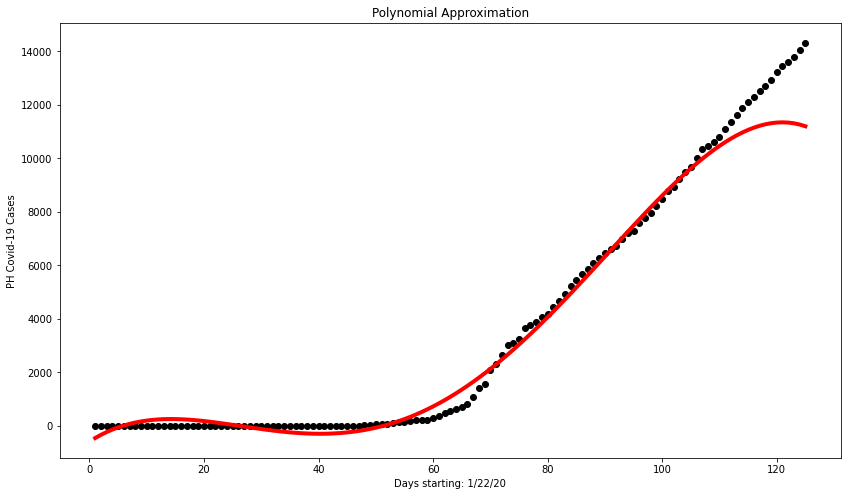

In [15]:
poly_reg    = PolynomialFeatures(degree=4)
X_poly      = poly_reg.fit_transform(X[:100])
pol_partial = LinearRegression()

pol_partial.fit(X_poly, y[:100])

pol_predictions = pol_partial.predict(poly_reg.fit_transform(X))
 
plot_polymonial(pol_predictions)

In [16]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[100:], philippine_cases[100:], np.ceil(pol_predictions[100:])]

       Date  Actual_Cases Predictions


array([['5/1/20', 8772, 8818.0],
       ['5/2/20', 8928, 9027.0],
       ['5/3/20', 9223, 9230.0],
       ['5/4/20', 9485, 9427.0],
       ['5/5/20', 9684, 9618.0],
       ['5/6/20', 10004, 9803.0],
       ['5/7/20', 10343, 9980.0],
       ['5/8/20', 10463, 10149.0],
       ['5/9/20', 10610, 10310.0],
       ['5/10/20', 10794, 10461.0],
       ['5/11/20', 11086, 10603.0],
       ['5/12/20', 11350, 10734.0],
       ['5/13/20', 11618, 10855.0],
       ['5/14/20', 11876, 10964.0],
       ['5/15/20', 12091, 11060.0],
       ['5/16/20', 12305, 11144.0],
       ['5/17/20', 12513, 11214.0],
       ['5/18/20', 12718, 11269.0],
       ['5/19/20', 12942, 11310.0],
       ['5/20/20', 13221, 11334.0],
       ['5/21/20', 13434, 11343.0],
       ['5/22/20', 13597, 11334.0],
       ['5/23/20', 13777, 11306.0],
       ['5/24/20', 14035, 11261.0],
       ['5/25/20', 14319, 11195.0]], dtype=object)

### DATE: '5/9/20', ACTUAL: 10610, PREDICTION: 10310  (NOT BAD FOR 4th DEGREE POLYNOMIAL)

## 5. BUT What if I USED THE OLD DATA UNTIL APRIL 8 ONLY ???

In [17]:
np.c_[dates[:78], philippine_cases[:78]]

array([['1/22/20', 0],
       ['1/23/20', 0],
       ['1/24/20', 0],
       ['1/25/20', 0],
       ['1/26/20', 0],
       ['1/27/20', 0],
       ['1/28/20', 0],
       ['1/29/20', 0],
       ['1/30/20', 1],
       ['1/31/20', 1],
       ['2/1/20', 1],
       ['2/2/20', 2],
       ['2/3/20', 2],
       ['2/4/20', 2],
       ['2/5/20', 2],
       ['2/6/20', 2],
       ['2/7/20', 3],
       ['2/8/20', 3],
       ['2/9/20', 3],
       ['2/10/20', 3],
       ['2/11/20', 3],
       ['2/12/20', 3],
       ['2/13/20', 3],
       ['2/14/20', 3],
       ['2/15/20', 3],
       ['2/16/20', 3],
       ['2/17/20', 3],
       ['2/18/20', 3],
       ['2/19/20', 3],
       ['2/20/20', 3],
       ['2/21/20', 3],
       ['2/22/20', 3],
       ['2/23/20', 3],
       ['2/24/20', 3],
       ['2/25/20', 3],
       ['2/26/20', 3],
       ['2/27/20', 3],
       ['2/28/20', 3],
       ['2/29/20', 3],
       ['3/1/20', 3],
       ['3/2/20', 3],
       ['3/3/20', 3],
       ['3/4/20', 3],
       ['3/5/20', 3],
  

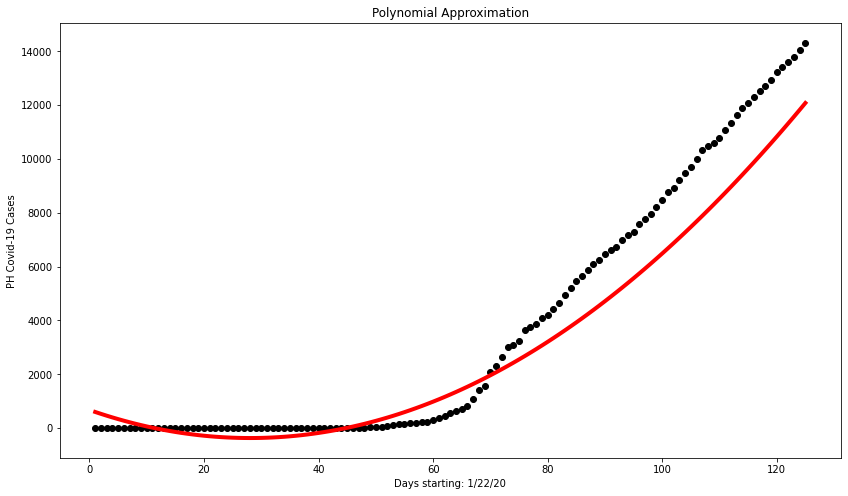

In [18]:
poly_reg    = PolynomialFeatures(degree=2)
X_poly      = poly_reg.fit_transform(X[:78])

pol_partial = LinearRegression()
pol_partial.fit(X_poly, y[:78])
pol_predictions = pol_partial.predict(poly_reg.fit_transform(X))

plot_polymonial(pol_predictions)

In [19]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[78:], philippine_cases[78:], np.ceil(pol_predictions[78:])]

       Date  Actual_Cases Predictions


array([['4/9/20', 4076, 3070.0],
       ['4/10/20', 4195, 3206.0],
       ['4/11/20', 4428, 3345.0],
       ['4/12/20', 4648, 3486.0],
       ['4/13/20', 4932, 3630.0],
       ['4/14/20', 5223, 3777.0],
       ['4/15/20', 5453, 3927.0],
       ['4/16/20', 5660, 4079.0],
       ['4/17/20', 5878, 4234.0],
       ['4/18/20', 6087, 4391.0],
       ['4/19/20', 6259, 4551.0],
       ['4/20/20', 6459, 4714.0],
       ['4/21/20', 6599, 4880.0],
       ['4/22/20', 6710, 5048.0],
       ['4/23/20', 6981, 5218.0],
       ['4/24/20', 7192, 5392.0],
       ['4/25/20', 7294, 5568.0],
       ['4/26/20', 7579, 5746.0],
       ['4/27/20', 7777, 5928.0],
       ['4/28/20', 7958, 6112.0],
       ['4/29/20', 8212, 6298.0],
       ['4/30/20', 8488, 6487.0],
       ['5/1/20', 8772, 6679.0],
       ['5/2/20', 8928, 6874.0],
       ['5/3/20', 9223, 7071.0],
       ['5/4/20', 9485, 7271.0],
       ['5/5/20', 9684, 7473.0],
       ['5/6/20', 10004, 7678.0],
       ['5/7/20', 10343, 7886.0],
       ['5/8/20', 10

### DATE: '5/9/20', ACTUAL: 10610, PREDICTION: 8310  (BAD PREDICTION)

## 6. How about selected data that are linear?

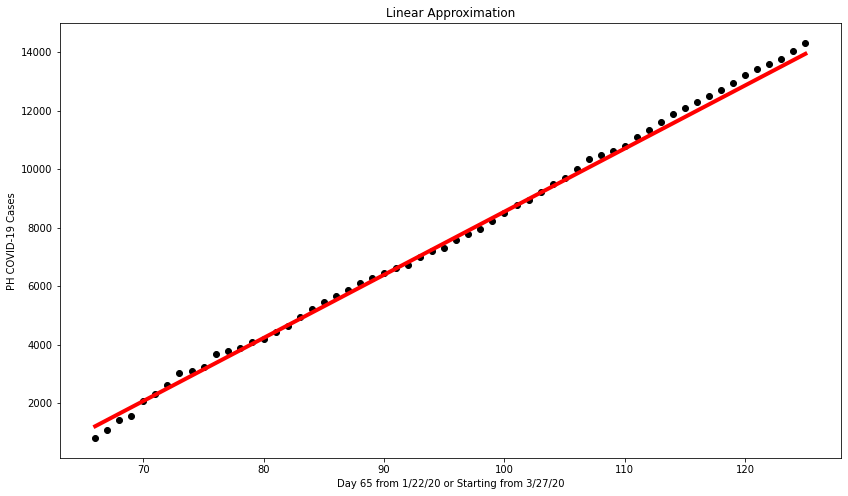

In [20]:
lin_partial = LinearRegression()
lin_partial.fit(X[65:100], y[65:100])
lin_predictions = lin_partial.predict(X[65:])

def plot_linear(predictions):
    plt.figure(figsize=(14,8))
    plt.scatter(X[65:], y[65:], color='black')
    plt.plot(X[65:], predictions, color='red', linewidth=4)
    plt.title( 'Linear Approximation' )
    plt.xlabel('Day 65 from 1/22/20 or Starting from 3/27/20')
    plt.ylabel('PH COVID-19 Cases')
    plt.show()
    return

plot_linear(lin_predictions)

In [21]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[65:], philippine_cases[65:], np.ceil(lin_predictions)]

       Date  Actual_Cases Predictions


array([['3/27/20', 803, 1206.0],
       ['3/28/20', 1075, 1422.0],
       ['3/29/20', 1418, 1638.0],
       ['3/30/20', 1546, 1854.0],
       ['3/31/20', 2084, 2070.0],
       ['4/1/20', 2311, 2285.0],
       ['4/2/20', 2633, 2501.0],
       ['4/3/20', 3018, 2717.0],
       ['4/4/20', 3094, 2933.0],
       ['4/5/20', 3246, 3149.0],
       ['4/6/20', 3660, 3364.0],
       ['4/7/20', 3764, 3580.0],
       ['4/8/20', 3870, 3796.0],
       ['4/9/20', 4076, 4012.0],
       ['4/10/20', 4195, 4228.0],
       ['4/11/20', 4428, 4443.0],
       ['4/12/20', 4648, 4659.0],
       ['4/13/20', 4932, 4875.0],
       ['4/14/20', 5223, 5091.0],
       ['4/15/20', 5453, 5307.0],
       ['4/16/20', 5660, 5522.0],
       ['4/17/20', 5878, 5738.0],
       ['4/18/20', 6087, 5954.0],
       ['4/19/20', 6259, 6170.0],
       ['4/20/20', 6459, 6386.0],
       ['4/21/20', 6599, 6602.0],
       ['4/22/20', 6710, 6817.0],
       ['4/23/20', 6981, 7033.0],
       ['4/24/20', 7192, 7249.0],
       ['4/25/20', 7294,

### DATE: '5/9/20', ACTUAL: 10610, PREDICTION: 10486  (GOOD PREDICTION!)

## 7. Support Vector Regression (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

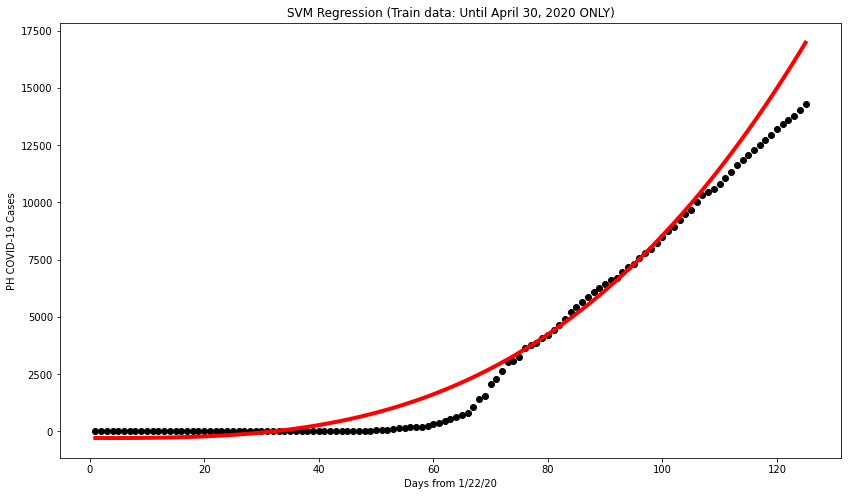

In [22]:
from sklearn.svm import SVR

svm_model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_model.fit(X[:100], y[:100])
svm_predictions = svm_model.predict(X)


def plot_linear(predictions):
    plt.figure(figsize=(14,8))
    plt.scatter(X, y, color='black')
    plt.plot(X, predictions, color='red', linewidth=4)
    plt.title( 'SVM Regression (Train data: Until April 30, 2020 ONLY)')
    plt.xlabel('Days from 1/22/20')
    plt.ylabel('PH COVID-19 Cases')
    plt.show()
    return


plot_linear(svm_predictions)

In [23]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[100:], philippine_cases[100:], np.ceil(svm_predictions[100:])]

       Date  Actual_Cases Predictions


array([['5/1/20', 8772, 8822.0],
       ['5/2/20', 8928, 9095.0],
       ['5/3/20', 9223, 9374.0],
       ['5/4/20', 9485, 9658.0],
       ['5/5/20', 9684, 9948.0],
       ['5/6/20', 10004, 10243.0],
       ['5/7/20', 10343, 10543.0],
       ['5/8/20', 10463, 10850.0],
       ['5/9/20', 10610, 11162.0],
       ['5/10/20', 10794, 11480.0],
       ['5/11/20', 11086, 11804.0],
       ['5/12/20', 11350, 12134.0],
       ['5/13/20', 11618, 12469.0],
       ['5/14/20', 11876, 12811.0],
       ['5/15/20', 12091, 13158.0],
       ['5/16/20', 12305, 13512.0],
       ['5/17/20', 12513, 13872.0],
       ['5/18/20', 12718, 14238.0],
       ['5/19/20', 12942, 14611.0],
       ['5/20/20', 13221, 14989.0],
       ['5/21/20', 13434, 15374.0],
       ['5/22/20', 13597, 15766.0],
       ['5/23/20', 13777, 16164.0],
       ['5/24/20', 14035, 16568.0],
       ['5/25/20', 14319, 16979.0]], dtype=object)

## 8. Multi-layer Perceptron regressor (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

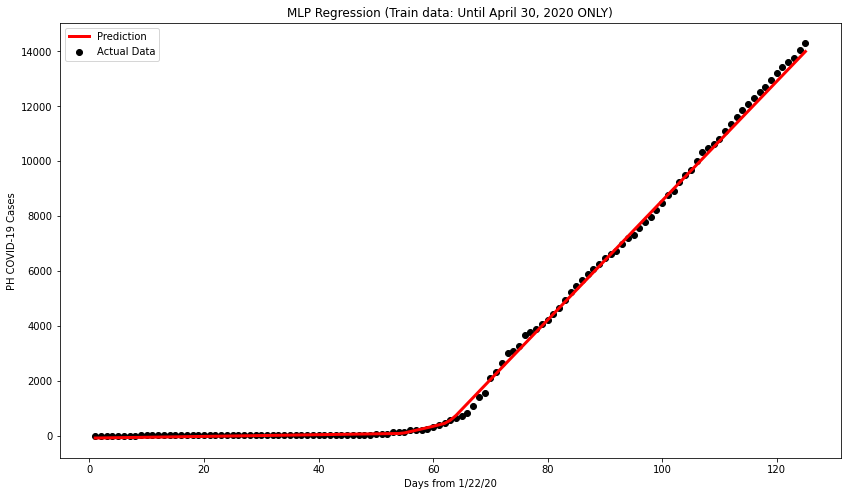

In [24]:
from sklearn.neural_network import MLPRegressor


mlp_model = MLPRegressor(solver='lbfgs', hidden_layer_sizes=50, max_iter=1000,
                    learning_rate='adaptive', random_state=np.random.seed(23))
mlp_model.fit(X[:100], y[:100])
mlp_predictions = mlp_model.predict(X)


plt.figure(figsize=(14,8))
plt.scatter(X, y, color='black', label= 'Actual Data')
plt.plot(X, mlp_predictions, 'r-', linewidth=3, label = 'Prediction')
plt.title( 'MLP Regression (Train data: Until April 30, 2020 ONLY)' )
plt.xlabel('Days from 1/22/20')
plt.ylabel('PH COVID-19 Cases')
plt.legend()
plt.show()


In [25]:
print('       Date ', 'Actual_Cases', 'Predictions')
np.c_[dates[100:], philippine_cases[100:], np.ceil(mlp_predictions[100:])]

       Date  Actual_Cases Predictions


array([['5/1/20', 8772, 8780.0],
       ['5/2/20', 8928, 8997.0],
       ['5/3/20', 9223, 9214.0],
       ['5/4/20', 9485, 9432.0],
       ['5/5/20', 9684, 9649.0],
       ['5/6/20', 10004, 9867.0],
       ['5/7/20', 10343, 10084.0],
       ['5/8/20', 10463, 10302.0],
       ['5/9/20', 10610, 10519.0],
       ['5/10/20', 10794, 10737.0],
       ['5/11/20', 11086, 10954.0],
       ['5/12/20', 11350, 11171.0],
       ['5/13/20', 11618, 11389.0],
       ['5/14/20', 11876, 11606.0],
       ['5/15/20', 12091, 11824.0],
       ['5/16/20', 12305, 12041.0],
       ['5/17/20', 12513, 12259.0],
       ['5/18/20', 12718, 12476.0],
       ['5/19/20', 12942, 12694.0],
       ['5/20/20', 13221, 12911.0],
       ['5/21/20', 13434, 13128.0],
       ['5/22/20', 13597, 13346.0],
       ['5/23/20', 13777, 13563.0],
       ['5/24/20', 14035, 13781.0],
       ['5/25/20', 14319, 13998.0]], dtype=object)